In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget /content/drive/MyDrive/archive.zip

/content/drive/MyDrive/archive.zip: Scheme missing.


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [ ]:
 import os #helps with file directories 
 import math
 import shutil #Move file from one folder to another
 import glob
 import matplotlib.pyplot as plt

In [ ]:
#count the number of images in the respetive classed 0 -tumour 1- malign
Root_Dir="/content/lung_colon_image_set/colon_image_sets"
number_of_images={}
for dir in os.listdir(Root_Dir):#LIST WHAT PRESENT IN THE DIRECTORY
  number_of_images[dir]= len(os.listdir(os.path.join(Root_Dir,dir)))

FileNotFoundError: ignored

In [ ]:
number_of_images.items()

dict_items([('colon_n', 5000), ('colon_aca', 5000)])

In [ ]:
len(os.listdir("/content/lung_colon_image_set/colon_image_sets"))

2

In [ ]:
from sklearn.model_selection import train_test_split
#Split data
#70% for train data
#15% for validation
#15% for testing

In [ ]:
#create a training folder
#if not os.path.exists("./train"):
 # os.mkdir("./train")

 # for dir in os.listdir(Root_Dir):
  #  os.makedirs("./train/"+dir)
    
   # for img in np.random.choice(a=os.listdir(os.path.join(Root_Dir,dir)),
    #                            size=(math.floor(0.7*number_of_images[dir])-5),
 #                               replace=False ):
  #    O=os.path.join(Root_Dir,dir,img)#path
   #   D=os.path.join("./train",dir)
    #  os.remove(O)
#else:
 # print("the folder exist")   


In [ ]:
#def dataFolder(p,split):
 # if not os.path.exists("./"+p):
 #   os.mkdir("./"+p)

 #   for dir in os.listdir(Root_Dir):
 ##     os.makedirs("./"+p+"/"+dir)
 #   
 #     for img in np.random.choice(a=os.listdir(os.path.join(Root_Dir,dir)),
#                                size=(math.floor(split*number_of_images[dir])-7),
                 #               replace=False ):
 #       O=os.path.join(Root_Dir,dir,img)#path
 #       D=os.path.join("./"+p,dir)
#        shutil.copy(0,0) #transfers the files
  #      os.remove(O)
  #else:
 #   print(f" {p}folder exist")  

In [ ]:
#dataFolder("train" ,0.7)

In [ ]:
#dataFolder("val", 0.15)

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
import keras

In [ ]:
#cnn model
model=Sequential()

model.add(Conv2D( filters= 16 , kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3) ))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#currently 2 convolutional layer and 2 maxpool layer
#convolutional layer is the features of the image
#dropping features to avoid overfitting
model.add(Dropout(rate=0.25))

model.add(Flatten())
#dense layers
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
#Units=1 gives probability of getting one or zero
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

preparing dataset for image data generation

In [ ]:
def preprocessingimages(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)#data augmentation
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/train"
train_data=preprocessingimages(path)

Found 7000 images belonging to 2 classes.


In [ ]:
#test
def preprocessingimages2(path):
  image_data=ImageDataGenerator(rescale=1/255)#no augmentation only rescaling
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/test"
test_data=preprocessingimages2(path)

Found 1500 images belonging to 2 classes.


In [ ]:
#validation
def preprocessingimages3(path):
  image_data=ImageDataGenerator(rescale=1/255)#no augmentation only rescaling
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/val"
val_data=preprocessingimages3(path)

Found 1500 images belonging to 2 classes.


In [ ]:
#early stopping and model checkpoint

#Performed

from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=10,verbose=1,mode='auto')
#patience decides when to stop.Here patience is an issue as it is causing overfitting issues.
#difference between accuracy and validation accuracy greater than 10->Overfitting
#model checkpoint

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./testmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

model training

In [ ]:

#Trained

h5=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,epochs=30,verbose=1,
                       validation_data=val_data,validation_steps=16,
                       callbacks=cd)
#verbose to display whatever is happening when execution

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8633
Epoch 1: val_accuracy improved from -inf to 0.91406, saving model to ./testmodel.h5
8/8 [==============================] - 26s 3s/step - loss: 0.3363 - accuracy: 0.8633 - val_loss: 0.2376 - val_accuracy: 0.9141
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.2142 - accuracy: 0.9297
Epoch 2: val_accuracy did not improve from 0.91406
8/8 [==============================] - 26s 3s/step - loss: 0.2142 - accuracy: 0.9297 - val_loss: 0.3354 - val_accuracy: 0.8633
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.8828
Epoch 3: val_accuracy did not improve from 0.91406
8/8 [==============================] - 27s 3s/step - loss: 0.2757 - accuracy: 0.8828 - val_loss: 0.8568 - val_accuracy: 0.6855
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.7852
Epoch 4: val_accuracy did not improve from 0.91406
8/8 [=========

model accuracy

In [ ]:
from keras.models import load_model
model=load_model("/content/testmodel.h5")

model accuracy

In [ ]:
acc=model.evaluate(test_data)[1]
print(acc)

47/47 [==============================] - 315s 7s/step - loss: 0.2403 - accuracy: 0.9160
0.9160000085830688


In [ ]:
path="/content/drive/MyDrive/test/colon_aca/colonca4118.jpeg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255#dividing the imag by 255 to normalise the image
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)

#pred=model.predict_classes(input_arr)[0][0]
#pred
pred=(model.predict(input_arr)[0][0] > 0.5).astype("int32")
pred
if pred:
  print("Benign")
else:
  print("Malignant")  

Malignant


In [ ]:
pred=model.predict(input_arr)
pred

array([[0.03991329]], dtype=float32)

In [ ]:
import numpy as geek

In [ ]:
train_data.class_indices

Model training using pretrained model

MobileNet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet,preprocess_input

In [ ]:
#Modifying preprocessing on test data suitable for mobilenet
def preprocessingimages4(path):
  image_data=ImageDataGenerator(preprocessing_function=preprocess_input)#no augmentation only rescaling
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/test"
test_data1=preprocessingimages4(path)

Found 1500 images belonging to 2 classes.


In [ ]:
#Modifying preprocessing on validation data suitable for mobilenet
def preprocessingimages5(path):
  image_data=ImageDataGenerator(preprocessing_function=preprocess_input)#no augmentation only rescaling
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/test"
val_data1=preprocessingimages5(path)

Found 1500 images belonging to 2 classes.


In [ ]:
def preprocessingimages6(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)#data augmentation
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path= "/content/drive/MyDrive/test"
train_data1=preprocessingimages6(path)

Found 1500 images belonging to 2 classes.


In [ ]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fba5ba0b990>>

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=1,activation='sigmoid')(X)

model=Model(base_model.input,X)

model.summary

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
#callbacks
from keras.callbacks import ModelCheckpoint,EarlyStopping 
mc=ModelCheckpoint(filepath="newmodel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,mode='auto')
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1)
cb=[mc,es]


In [ ]:
hist=model.fit_generator(train_data1,steps_per_epoch=8,
                         epochs=30,validation_steps=16,
                         validation_data=val_data1,callbacks=cb)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.4179 - accuracy: 0.7617
Epoch 00001: val_accuracy improved from -inf to 0.96094, saving model to newmodel.h5
8/8 [==============================] - 98s 12s/step - loss: 1.4179 - accuracy: 0.7617 - val_loss: 0.1020 - val_accuracy: 0.9609
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.3452 - accuracy: 0.9258
Epoch 00002: val_accuracy improved from 0.96094 to 0.96289, saving model to newmodel.h5
8/8 [==============================] - 52s 7s/step - loss: 0.3452 - accuracy: 0.9258 - val_loss: 0.2259 - val_accuracy: 0.9629
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.2577 - accuracy: 0.9484
Epoch 00003: val_accuracy improved from 0.96289 to 0.97461, saving model to newmodel.h5
8/8 [==============================] - 31s 4s/step - loss: 0.2577 - accuracy: 0.9484 - val_loss: 0.0878 - val_accuracy: 0.9746
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.2033 - accura

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/MyDrive/newmodel.h5")

In [ ]:
acc=model.evaluate_generator(test_data1)[1]#i is given as it returns loss and accuracy
print(acc)

0.9940000176429749


In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

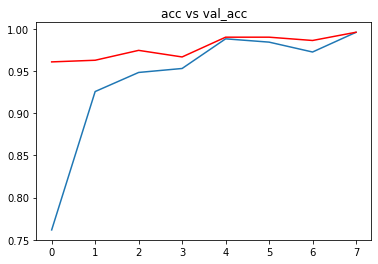

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs val_acc')
plt.show()

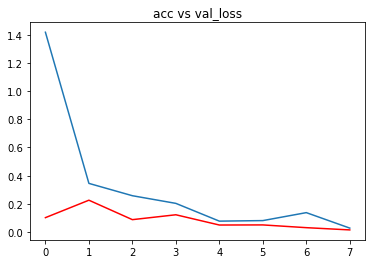

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('acc vs val_loss')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
import keras
from keras.preprocessing import image

In [ ]:
#path="/content/lung_colon_image_set/colon_image_sets/colon_aca/colonca10.jpeg"
#img=load_img(path,target_size=(224,224))
#i=image.img_to_array(img)/255#dividing the imag by 255 to normalise the image
#i=preprocess_input(i)
#input_arr=np.array([1])
#input_arr.shape

#pred=model.predict_classes(input_arr)[0][0]
#pred
#pred=(model.predict(input_arr)[0][0] > 0.5).astype("int32")

#pred=np.argmax(model.predict(input_arr))#here we get two neurons and it specifies which neuron has the highest probability by having highest value


#pred

In [ ]:
path="/content/drive/MyDrive/test/colon_aca/colonca3504.jpeg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255#dividing the imag by 255 to normalise the image
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)

#pred=model.predict_classes(input_arr)[0][0]
#pred
pred=(model.predict(input_arr)[0][0] > 0.5).astype("int32")
if pred:
  print("Benign")
else:
  print("Malignant")  

Malignant
